In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
sns.set()

In [89]:

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
#y = np.sin(x)
#y = np.sin(1/x)
y = np.sign(np.sin(8 * x))

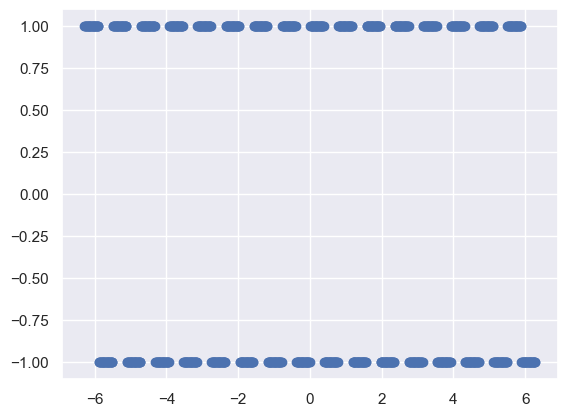

In [90]:
plt.scatter(x, y)

In [91]:
def kernel(x, x0, w):
    x = x - x0
    return ((x < w) * (x > 0)).astype(float)


def linear_kernel(x, x0, w):
    x = x - x0
    x = x / w
    return ((1 - np.abs(x)) * (np.abs(x) < 1)).astype(float)

def sinc_kernel(x, x0: float, w: float, alpha: float = np.inf):
    """Normalized sine interpolation kernel"""
    x = x - x0
    x = x / w
    return (x >= -alpha) * (x < alpha) * np.sinc(x)

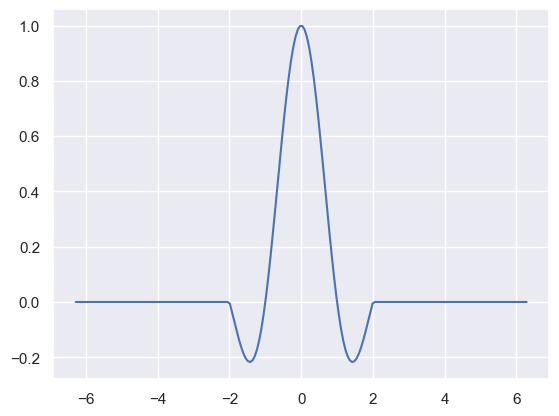

In [92]:
xk = np.linspace(-2 * np.pi, 2 * np.pi, 200)
plt.plot(xk, sinc_kernel(xk, x0=0, w=1, alpha=2))
#plt.plot(xk,kernel(xk,x0=0,w=1))
#plt.plot(xk,linear_kernel(xk,x0=0,w=1))

In [93]:
w = np.diff(x)[0]
w

0.012578949563923025

In [106]:
kernels = []

for xsample, ysample in zip(x, y):
    xk = np.linspace(-2 * np.pi, 2 * np.pi, 50)
    #k = ysample * sinc_kernel(xk, x0=xsample, w=w, alpha=np.pi)
    #k = ysample * linear_kernel(xk,x0=xsample,w=w)
    k = ysample * kernel(xk,x0=xsample,w=w)
    kernels.append(k)

In [107]:
kernels = np.asarray(kernels)
kernels.shape

(1000, 50)

In [108]:
yinterp = kernels.sum(axis=0)

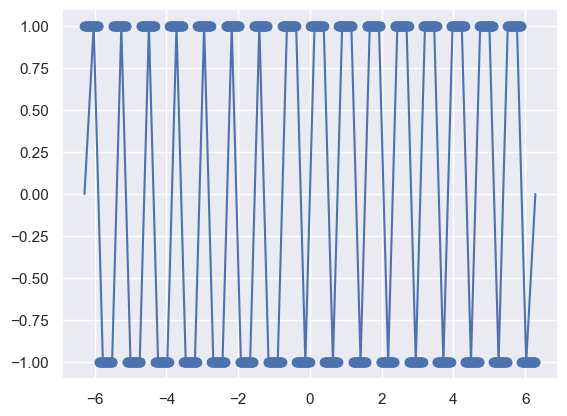

In [109]:
plt.plot(xk, yinterp)
plt.scatter(x, y)

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
f"{(mean_squared_error(yinterp, np.sin(xk)) / np.std(np.sin(xk))):.4%}"

'210.3188%'